In [9]:
from datetime import datetime

import statistics as stat
import pandas as pd
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import numpy as np

In [178]:
def pairsTradeModel(sOne, sTwo, cash, buyaggro, sellaggro, zscore, startday):
    ratio = sOne/sTwo
    value = []
    opt1 = []
    opt2 = []
    sOneHold = 0
    sTwoHold = 0
    mu = stat.mean(ratio[0:startday-1])
    sigma = stat.stdev(ratio[0:startday-1])
    for i in range(len(sOne)):
        x = ratio[i]       
        if i > startday:
            # Changed the mean/st.dev algorithms to ones that only involved n calculations. Previously we performed
            # at least n^2 calculations, hence why it took forever...
            muold = mu
            mu = mu + ((ratio[i]-mu)/i)
            sigma = ((i-1-1)/(i-1))*(sigma**2)+(1/(i-1))*(ratio[i]-mu)*(ratio[i]-muold)
            # see https://stats.stackexchange.com/questions/24878/computation-of-new-standard-deviation-using-old-standard-deviation-after-change
            if x > mu + (sigma*zscore):
                cash = cash + (round(sOneHold*sellaggro)* sOne[i])
                sOneHold -= round(sOneHold*sellaggro)
                sTwoHold += round((cash*buyaggro)/sTwo[i])
                cash = cash - ((round((cash*buyaggro)/sTwo[i]))* sTwo[i])
            
            if x < mu - (sigma*zscore):
                cash = cash + round(sTwoHold*sellaggro)* sTwo[i]
                sTwoHold -= round(sTwoHold*sellaggro)
                sOneHold += round((cash*buyaggro)/sOne[i])
                cash = cash - ((round((cash*buyaggro)/sOne[i]))* sOne[i])
                               
        portfolioVal = cash + (sTwoHold * sTwo[i]) + (sOneHold * sOne[i])
        value.append(portfolioVal)
        
        if i > startday:
            opt1.append((portfolioVal/value[startday])*100)
            opt2.append((sOne[i]/sOne[startday])*100)
        #ratio.append(x)
        
    #print(coint(sOne, sTwo, autolag = 'aic'))
    
    cash = cash + (sOneHold * sOne[len(sOne)-1]) + (sTwoHold * sTwo[len(sTwo)-1])
    print('Pairs Return:' + str(cash/10000))
    print("Regular Return:" + str(sOne[len(sOne)-1]/sOne[90]))
        
    plt.plot(opt1, color='green')
    plt.plot(opt2, color='red')
    plt.show()
    
    return

In [179]:
def main():
    df = pd.read_csv('stock.csv')   
    #df = np.genfromtxt('stock.csv', dtype=float, delimiter=",",skip_header=1)
    #VOO = df[:,1]
    #SPY = df[:,2]
    numpy_df = np.asarray(df)
    #print(numpy_df)
    VOO = numpy_df[:,1]
    #VOO.astype(int)
    SPY = numpy_df[:,2]
    #SPY.astype(int)
    #VOO = df['VOO']
    #SPY = df['SPY']
    
    pairsTradeModel(VOO, SPY, 10000, 0.30, 0.30, 0.53, 90)
    return

Pairs Return:1.4734699360999999
Regular Return:1.4496874462685876


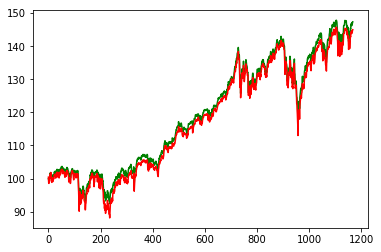

Executed in: 0:00:00.112957


In [180]:
if __name__ == "__main__":
    startTime = datetime.now()
    main()
    print("Executed in:", datetime.now() - startTime)

In [163]:
data = pd.read_csv('prices.csv')
data.head()

,Unnamed: 0,buy_yes_x,buy_yes_y
0,0,0.04,0.07
1,1,0.04,0.07
2,2,0.04,0.07
3,3,0.04,0.07
4,4,0.04,0.07
